In [1]:
# List all device
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [2]:
# Check available GPU
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[]

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";  

In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Reshape, Lambda, GRU, BatchNormalization, Bidirectional
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.activations import softmax
from keras.optimizers import SGD, RMSprop
import math
import pickle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [5]:
index = "dowjones"
# index = "frankfurt"
with open(f"../data/{index}_calculated/absolute_periods750_250_240.txt", "rb") as fp:   # Unpickling
    dataset = pickle.load(fp)

In [6]:
i = 7
timestep = 240
feature = 31

In [7]:
x_train = dataset[0][i][0].values
x_test = dataset[1][i][0].values

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

y_train = to_categorical(dataset[0][i][1].values, 2)
y_test = to_categorical(dataset[1][i][1].values, 2)

In [8]:
print(f"x train shape: {x_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"x test shape: {x_test.shape}")
print(f"y test shape: {y_test.shape}")

x train shape: (750, 31)
y train shape: (750, 31, 2)
x test shape: (490, 31)
y test shape: (490, 31, 2)


In [9]:
j = 25
x_series = [x_train[i:i+timestep, j] for i in range(x_train.shape[0] - timestep)]
y_series = [y_train[i+timestep, j] for i in range(y_train.shape[0] - timestep)]
x = np.array(x_series)
y = np.array(y_series)
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (510, 240)
y shape: (510, 2)


In [10]:
x_series1 = [x_test[i:i+timestep, j] for i in range(x_test.shape[0] - timestep)]
y_series1 = [y_test[i+timestep, j] for i in range(y_test.shape[0] - timestep)]
x1 = np.array(x_series1)
y1 = np.array(y_series1)
print(f"x1 shape: {x1.shape}")
print(f"y1 shape: {y1.shape}")

x1 shape: (250, 240)
y1 shape: (250, 2)


In [11]:
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
x1 = np.reshape(x1, (x1.shape[0], x1.shape[1], 1))

In [12]:
dropout_level = 0.1
regressor = Sequential()
regressor.add(LSTM(units=25, input_shape=(timestep, 1), recurrent_dropout=dropout_level, dropout=dropout_level))
# regressor.add(Dense(feature * 2, activation='relu'))
# regressor.add(Reshape((feature, 2)))
# regressor.add(Lambda(lambda x: softmax(x, axis=-1)))
regressor.add(Dense(2, activation='softmax'))
regressor.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25)                2700      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 52        
Total params: 2,752
Trainable params: 2,752
Non-trainable params: 0
_________________________________________________________________


In [13]:
# result = regressor.fit_generator(train_gen, steps_per_epoch=len(train_gen), epochs=1000)
result = regressor.fit(x, y,batch_size=1000, epochs=1000, validation_split=0.2, callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=20),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_acc', save_best_only=True)])
# result = regressor.fit(x, y,batch_size=1000, epochs=1000, validation_data=(x1, y1), callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=20),
#              ModelCheckpoint(filepath='best_model.h5', monitor='val_acc', save_best_only=True)])

Train on 408 samples, validate on 102 samples
Epoch 1/1000
408/408 [==============================] - 1s 4ms/step - loss: 0.6910 - acc: 0.5110 - val_loss: 0.7022 - val_acc: 0.5196
Epoch 2/1000
408/408 [==============================] - 0s 891us/step - loss: 0.6888 - acc: 0.5221 - val_loss: 0.7016 - val_acc: 0.5196
Epoch 3/1000
408/408 [==============================] - 0s 717us/step - loss: 0.6896 - acc: 0.5319 - val_loss: 0.7010 - val_acc: 0.4902
Epoch 4/1000
408/408 [==============================] - 0s 812us/step - loss: 0.6890 - acc: 0.5245 - val_loss: 0.7008 - val_acc: 0.4804
Epoch 5/1000
408/408 [==============================] - 0s 836us/step - loss: 0.6895 - acc: 0.5319 - val_loss: 0.6997 - val_acc: 0.4804
Epoch 6/1000
408/408 [==============================] - 0s 756us/step - loss: 0.6874 - acc: 0.5392 - val_loss: 0.6996 - val_acc: 0.4706
Epoch 7/1000
408/408 [==============================] - 0s 780us/step - loss: 0.6881 - acc: 0.5417 - val_loss: 0.6987 - val_acc: 0.4608
Epoc

Epoch 61/1000
408/408 [==============================] - 0s 744us/step - loss: 0.6815 - acc: 0.5735 - val_loss: 0.6949 - val_acc: 0.5196
Epoch 62/1000
408/408 [==============================] - 0s 754us/step - loss: 0.6773 - acc: 0.5784 - val_loss: 0.6952 - val_acc: 0.5098
Epoch 63/1000
408/408 [==============================] - 0s 709us/step - loss: 0.6812 - acc: 0.5662 - val_loss: 0.6940 - val_acc: 0.5098
Epoch 64/1000
408/408 [==============================] - 0s 662us/step - loss: 0.6805 - acc: 0.5662 - val_loss: 0.6941 - val_acc: 0.5098
Epoch 65/1000
408/408 [==============================] - 0s 723us/step - loss: 0.6782 - acc: 0.5735 - val_loss: 0.6942 - val_acc: 0.5098
Epoch 66/1000
408/408 [==============================] - 0s 760us/step - loss: 0.6794 - acc: 0.5686 - val_loss: 0.6941 - val_acc: 0.5098
Epoch 67/1000
408/408 [==============================] - 0s 765us/step - loss: 0.6778 - acc: 0.5760 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 68/1000
408/408 [==================

In [14]:
print(max(result.history["val_acc"]))

0.5392156839370728


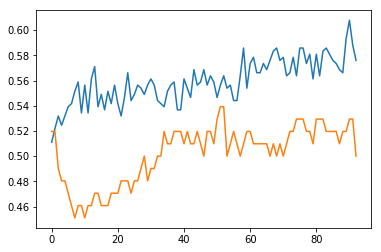

In [15]:
plt.plot(result.history["acc"])
plt.plot(result.history["val_acc"])

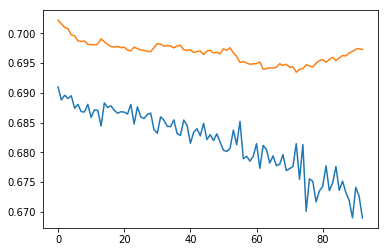

In [16]:
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])

In [17]:
regressor.predict(x1)

array([[0.5217025 , 0.4782975 ],
       [0.6211792 , 0.3788208 ],
       [0.58739483, 0.41260517],
       [0.40638766, 0.5936124 ],
       [0.2841099 , 0.71589005],
       [0.43753   , 0.56246996],
       [0.5686406 , 0.43135944],
       [0.5605896 , 0.4394104 ],
       [0.5104186 , 0.48958135],
       [0.5030097 , 0.49699035],
       [0.576192  , 0.42380795],
       [0.45508423, 0.5449158 ],
       [0.40022647, 0.5997735 ],
       [0.32768223, 0.67231774],
       [0.4636616 , 0.5363384 ],
       [0.42698804, 0.57301193],
       [0.3358506 , 0.6641494 ],
       [0.35932362, 0.6406763 ],
       [0.45005697, 0.54994303],
       [0.5252289 , 0.47477108],
       [0.3582917 , 0.6417084 ],
       [0.42844164, 0.57155836],
       [0.29872   , 0.70128006],
       [0.36506963, 0.6349304 ],
       [0.24851155, 0.75148845],
       [0.22027177, 0.77972823],
       [0.27137563, 0.7286243 ],
       [0.22312413, 0.7768759 ],
       [0.30734992, 0.69265014],
       [0.2998649 , 0.7001351 ],
       [0.